In [74]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#https://keras.io/api/datasets/mnist/
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
X_train,X_test = X_train/255.0,X_test/255.0

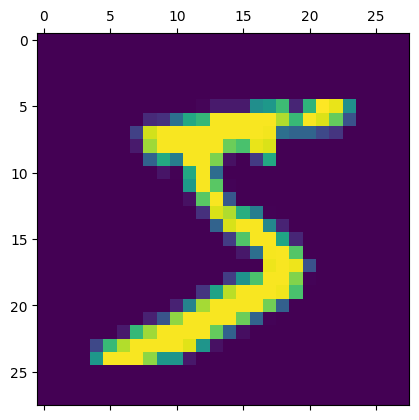

In [76]:
plt.matshow(X_train[0])

In [77]:
X_test.shape

(10000, 28, 28)

In [78]:
X_train_flatten=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flatten=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [79]:
print(f"X_test has shape  {X_test_flatten.shape} and X_train has the shape {X_train_flatten.shape} ")

X_test has shape  (10000, 784) and X_train has the shape (60000, 784) 


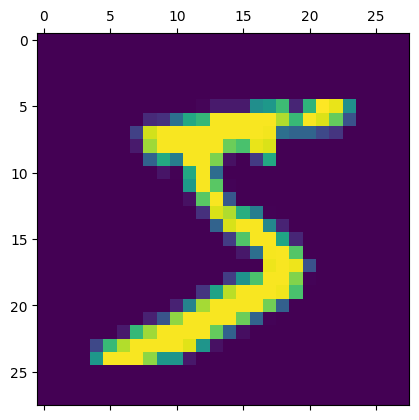

In [80]:
plt.matshow(X_train_flatten[0].reshape(28,28))

In [81]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [82]:
NN_model=Sequential([
                    Dense(10,activation='softmax',input_shape=(784,))
                    ])

NN_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [83]:
NN_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
NN_model.fit(X_train_flatten,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8090 - loss: 0.7230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9139 - loss: 0.3097
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9213 - loss: 0.2819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 0.2714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2683
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9292 - loss: 0.2571
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9302 - loss: 0.2545
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9296 - loss: 0.2564
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9294 - loss: 0.2495
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9323 - loss: 0.2491


In [85]:
from sklearn.metrics import classification_report

In [86]:
Y_predicted = NN_model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


In [87]:
Y_predicted_new=np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_predicted_new[i]+=np.argmax(Y_predicted[i])

In [88]:
Y_predicted_new.shape

(10000,)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predicted_new))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [89]:
from tensorflow.math import confusion_matrix

In [90]:
confusion_mtx = confusion_matrix(labels=Y_test, predictions=Y_predicted_new)
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    1,    5,    6,    4,    1,    0],
       [   0, 1114,    4,    0,    0,    1,    4,    2,   10,    0],
       [   4,    8,  944,    9,    9,    4,   11,    8,   32,    3],
       [   5,    0,   25,  898,    1,   30,    2,   13,   29,    7],
       [   1,    1,    6,    1,  926,    0,    6,    4,    9,   28],
       [   9,    3,    3,   24,   13,  779,   13,    9,   34,    5],
       [   9,    3,    8,    1,    8,   10,  913,    2,    4,    0],
       [   1,    7,   26,    2,    7,    0,    0,  954,    1,   30],
       [   6,   10,    7,   14,    9,   18,   10,   12,  880,    8],
       [   9,    7,    1,    7,   28,    6,    0,   26,    8,  917]])>

Text(95.72222222222221, 0.5, 'True')

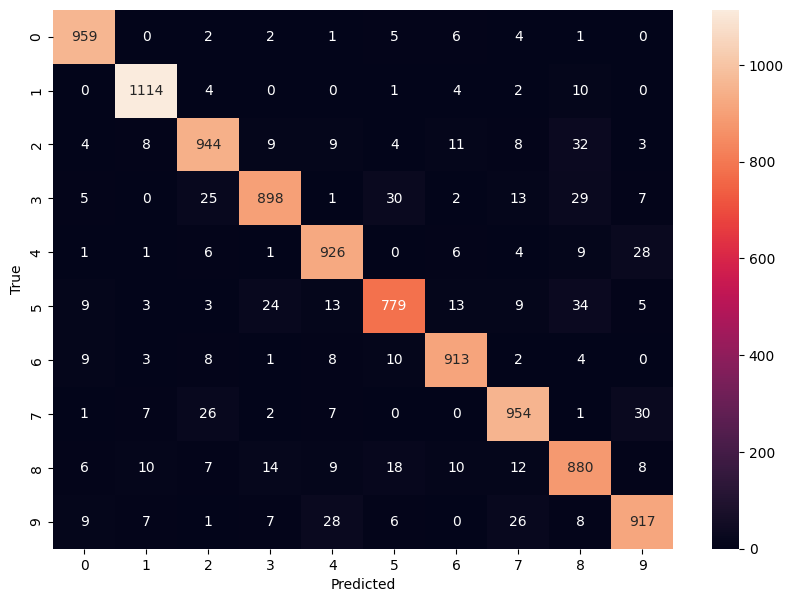

In [91]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [93]:
NN_model=Sequential([
                    Dense(100,activation='relu',input_shape=(784,)),
                    Dense(10,activation='softmax')
                    ])

NN_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])


In [94]:
NN_model.fit(X_train_flatten,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8696 - loss: 0.4614
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1308
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0472
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0378
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0299
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0254
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9939 - loss: 0.0208
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9942 - loss: 0.0188


In [95]:
Y_predicted = NN_model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


In [96]:
Y_predicted_new=np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_predicted_new[i]+=np.argmax(Y_predicted[i])

In [97]:
confusion_mtx = confusion_matrix(labels=Y_test, predictions=Y_predicted_new)
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    1,    1,    2,    1,    3,    0],
       [   0, 1124,    4,    0,    0,    1,    2,    1,    3,    0],
       [   8,    1, 1005,    5,    1,    0,    2,    5,    4,    1],
       [   0,    0,    3,  999,    0,    5,    0,    1,    1,    1],
       [   0,    0,    0,    1,  956,    0,   10,    1,    2,   12],
       [   2,    0,    0,   10,    2,  862,    6,    2,    5,    3],
       [   3,    2,    1,    1,    2,    1,  947,    0,    1,    0],
       [   2,    3,   10,    4,    1,    0,    0,  999,    2,    7],
       [   4,    1,    2,    9,    5,    5,    2,    3,  939,    4],
       [   1,    3,    0,    4,    6,    5,    1,    2,    2,  985]])>

Text(95.72222222222221, 0.5, 'True')

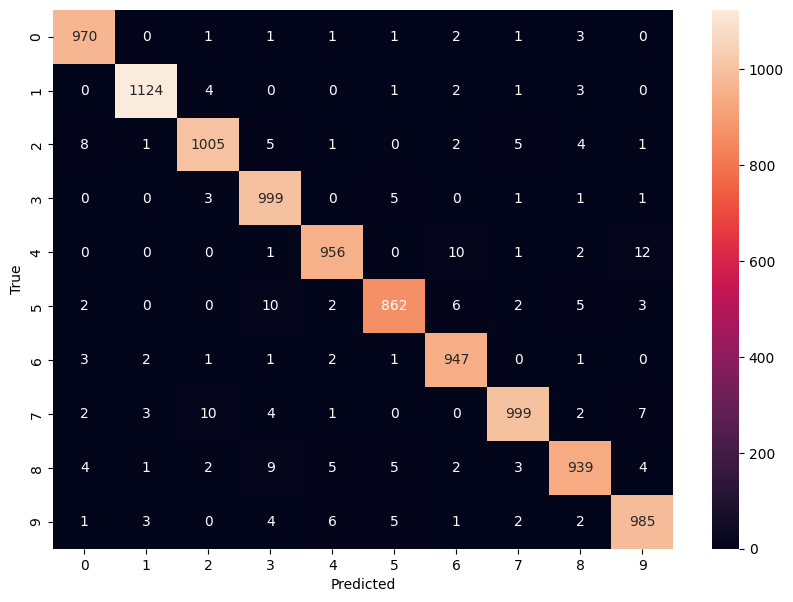

In [98]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [100]:
print(classification_report(Y_test, Y_predicted_new))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

